In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

#runge function, I am using this function 
def runge_fun(x):
    return 1/(1+(25*(x**2)))

# Generate number of Equidistant Points in given interval
def getEquidistantPoints(start, end, no_of_points):
    return np.linspace(start, end, no_of_points)

#populate y values for corresponding x using  function
def populate_y(x_values,function):
    y=[]
    for i in x_values:
        y.append(function(i))
    return y

#this function is to plot coustom function
def plot_function(function,start,end):
    #x_plt and y_plt are jut to plot Runge function 
    x_plt = np.arange(start, end, 0.001)   # start,stop,step
    y_plt=[]
    for j in x_plt:
        y_plt.append(function(j))
    return x_plt,y_plt


###### 

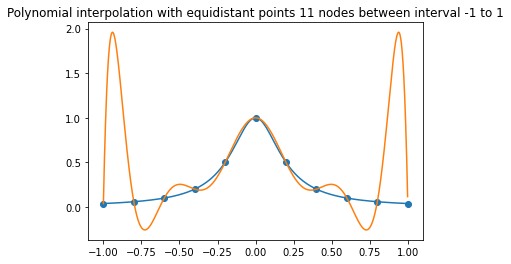

In [6]:
#Lagrange interpolation
def lagrange(x, w):
# Parameters x is x values and w is corresponding output for in x ie. f(xi)=wi
    M = len(x)
    p = np.poly1d(0.0)
    for j in range(M):
        pt = np.poly1d(w[j])
        for k in range(M):
            if k == j:
                continue
            fac = x[j]-x[k]
            pt *= np.poly1d([1.0, -x[k]])/fac
        p += pt
    return p

#Lagrange polynomial for runge function with 11 nodes and interal -1 to 1
lagrange_11=lagrange(getEquidistantPoints(-1, 1, 11),populate_y(getEquidistantPoints(-1, 1, 11),runge_fun))

#Lagrange polynomial for runge function with 23 nodes and interal -1 to 1
lagrange_23=lagrange(getEquidistantPoints(-1, 1, 23),populate_y(getEquidistantPoints(-1, 1, 23),runge_fun))

x,y=plot_function(runge_fun,-1, 1)
x_11,y_11=plot_function(lagrange_11,-1, 1)
x_23,y_23=plot_function(lagrange_23,-1, 1)
# Displaying output
plt.plot(x,y)
plt.plot(x_11,y_11)
plt.scatter(getEquidistantPoints(-1, 1, 11), populate_y(getEquidistantPoints(-1, 1, 11),runge_fun))
plt.title("Polynomial interpolation with equidistant points 11 nodes between interval -1 to 1")
plt.savefig('eq_11.png',bbox_inches='tight')
plt.show()



<span style='background :yellow' > observation:Strong oscillations near the endpoints of the interval  </span>


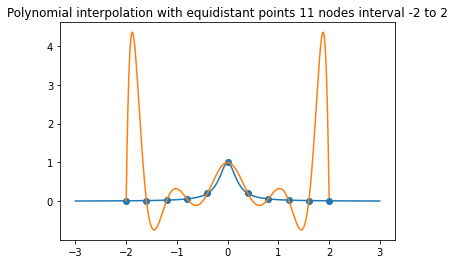

In [8]:
lagrange_112=lagrange(getEquidistantPoints(-2, 2, 11),populate_y(getEquidistantPoints(-2, 2, 11),runge_fun))
lagrange_232=lagrange(getEquidistantPoints(-2, 2, 23),populate_y(getEquidistantPoints(-2, 2, 23),runge_fun))

x2,y2=plot_function(runge_fun,-3, 3)
x_112,y_112=plot_function(lagrange_112,-2, 2)
x_232,y_232=plot_function(lagrange_232,-2, 2)
# Displaying output
plt.plot(x2,y2)
plt.plot(x_112,y_112)
plt.scatter(getEquidistantPoints(-2, 2, 11), populate_y(getEquidistantPoints(-2, 2, 11),runge_fun))
plt.title("Polynomial interpolation with equidistant points 11 nodes interval -2 to 2")

plt.show()

<span style='background :yellow' > observation:Strong oscillations near the endpoints of the interval  </span>



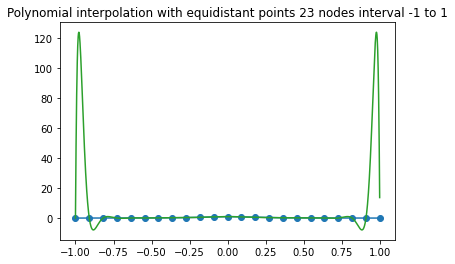

In [9]:
plt.plot(x,y,-1, 1)
plt.plot(x_23,y_23,-1, 1)
plt.scatter(getEquidistantPoints(-1, 1, 23), populate_y(getEquidistantPoints(-1, 1, 23),runge_fun))
plt.title("Polynomial interpolation with equidistant points 23 nodes interval -1 to 1")
plt.savefig('eq_23.png',bbox_inches='tight')
plt.show()



<span style='background :yellow' > observation:Strong oscillations near the endpoints of the interval  </span>



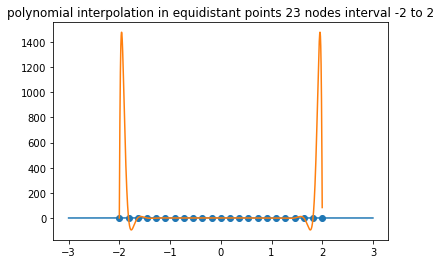

In [88]:
plt.plot(x2,y2)
plt.plot(x_232,y_232)
plt.scatter(getEquidistantPoints(-2, 2, 23), populate_y(getEquidistantPoints(-2, 2, 23),runge_fun))
plt.title("polynomial interpolation in equidistant points 23 nodes interval -2 to 2")
plt.show()



<span style='background :yellow' > observation:Strong oscillations near the endpoints of the interval and as nodes increases we see the error also increses  </span>



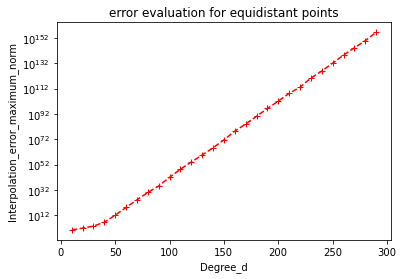

In [10]:
x_err = np.linspace(-1, 1, 1001)
err=[]  
for d in range(1, 30):
    d=d*10
    t = np.linspace(-1, 1, d+1)
    p=lagrange(t,populate_y(t,runge_fun))
    y_err=[]
    for i in x_err:
        y_err.append(p(i))
    err.append(np.hstack([d,max(abs(y_err-np.asarray(runge_fun(x_err))))]))
    
err = np.asarray(err)
plt.figure()
plt.semilogy(err[:,0],err[:,1],"r--+")
plt.xlabel(r"Degree_d")
plt.ylabel(r"Interpolation_error_maximum_norm")
plt.title("error evaluation for equidistant points")
plt.savefig('error.png',bbox_inches='tight')
plt.show()


 <span style='background :yellow' >  In above graph you can see that max norm , the error increases for polynomial degree </span>



In [11]:
def generate_cheb_nodes(a,b,no_of_nodes):
    yp=[]
    n=no_of_nodes-1
    for i in range(n+1):
        yp.append((a+(0.5*(b-a)*((np.cos(i*np.pi/n))+1))))
    return yp

xd_11=generate_cheb_nodes(-1,1,11)
yd_11= populate_y(xd_11,runge_fun)


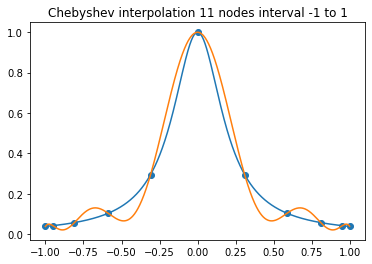

In [12]:
def chebyshev_coef_1d ( nd, xd, yd ):


#  Parameters:
#
#    Input, integer ND, the number of Chebyshev points.
#    ND must be at least 1.
#
#    Input, real XD(ND), the data locations.
#
#    Input, real YD(ND), the data values.
#
#    Output, real C(ND), the Chebyshev coefficients.
#
#    Output, real XMIN, XMAX, the interpolation interval.
#
    xmin = min ( xd )
    xmax = max ( xd )
#
#  Map XD to [-1,+1].
#
    x=[]
    for i in xd:
        x.append(( 2.0 * i - xmin - xmax ) / ( xmax - xmin ))
        
    n=nd-1  #n is degree 
    
    c=[]
    for j in range(nd):
        temp=0
        for k in range(nd):
            if k==0 or k==n:
                temp=temp+(.5*yd[k]*np.cos(j*np.arccos(x[k])))
            else:
                temp=temp+(yd[k]*np.cos(j*np.arccos(x[k])))               
        if j==0 or j==n:
            c.append((1/n)*temp)
        else:
            c.append((2/n)*temp)


    return c, xmin, xmax

def chebyshev_interp_1d ( nd, xd, yd, xi ):
    c, xmin, xmax = chebyshev_coef_1d ( nd, xd, yd )
    yi = chebyshev_value_1d ( nd, c, xmin, xmax,  xi )
    return yi

def chebyshev_value_1d ( nd, c, xmin, xmax, xi ):


## CHEBYSHEV_VALUE_1D evaluates a Chebyshev interpolant, given its coefficients.
#
#  Parameters:
#
#    Input, integer ND, the number of data points.
#    ND must be at least 1.
#
#    Input, real C(ND), the Chebyshev coefficients.
#
#    Output, real XMIN, XMAX, the interpolation interval.
#
#    Input, real XI, the interpolation points, which
#    must be each be in the interval [XMIN,XMAX].
#
#    Output, real YI, the interpolated values.
#

    if ( nd == 1 ):
        yi = c.copy ( )
        return yi
#
#  Map XI to [-1,+1].
#
    x = ( 2.0 * xi - xmin - xmax ) / ( xmax - xmin )
    yi=0
    for j in range(nd):
        yi=yi+(c[j]*np.cos(j*np.arccos(x)))
    return yi



x_pltc = np.arange(-1, 1, 0.001)   # start,stop,step
y_pltc=[]
for j in x_pltc:
    y_pltc.append(chebyshev_interp_1d ( 11, xd_11, yd_11, j ))
plt.plot(x,y)
plt.plot(x_pltc,y_pltc)
plt.scatter(xd_11, populate_y(xd_11,runge_fun))
plt.title("Chebyshev interpolation 11 nodes interval -1 to 1")
plt.savefig('cheb_11.png',bbox_inches='tight')
plt.show()


 <span style='background :yellow' >  Above we can see no oscillations at end in next graph we will see the convergense as number of nodes  increases</span>



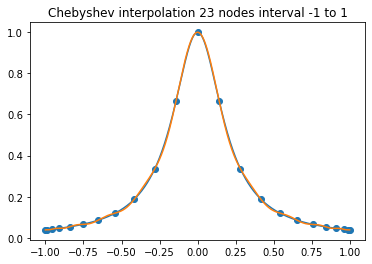

In [13]:
xd_23=generate_cheb_nodes(-1,1,23)
yd_23= populate_y(xd_23,runge_fun)
y_pltc_23=[]
for j in x_pltc:
    y_pltc_23.append(chebyshev_interp_1d ( 23, xd_23, yd_23, j ))
plt.plot(x,y)
plt.plot(x_pltc,y_pltc_23)
plt.scatter(xd_23, populate_y(xd_23,runge_fun))
plt.title("Chebyshev interpolation 23 nodes interval -1 to 1")
plt.savefig('cheb_23.png',bbox_inches='tight')
plt.show()


 <span style='background :yellow' >  in previous we choose 11 nodes and here we took 23 nodes and now we can see as number of nodes increases it converges to the function we are trying to interpolate , but in later we will here at some point increase nodes wont make big changes as a result of aliasing</span>




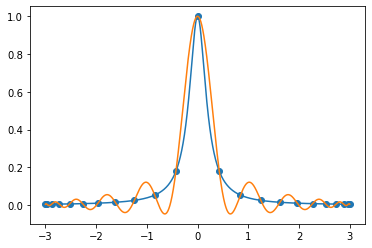

In [10]:
xd_232=generate_cheb_nodes(-3,3,23)
yd_232= populate_y(xd_232,runge_fun)
x_pltc2 = np.arange(-3, 3, 0.001)   # start,stop,step
y_pltc2=[]
for j in x_pltc2:
    y_pltc2.append(chebyshev_interp_1d ( 23, xd_232, yd_232, j ))
plt.plot(x2,y2)
plt.plot(x_pltc2,y_pltc2)
plt.scatter(xd_232, populate_y(xd_232,runge_fun))
plt.title("Chebyshev interpolation 23 nodes interval -3 to 3")
plt.show()

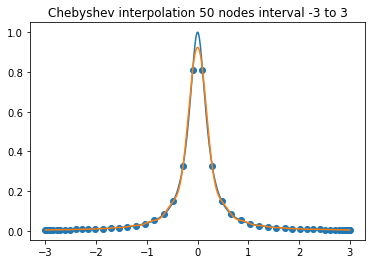

In [78]:
xd_2321=generate_cheb_nodes(-3,3,50)
yd_2321= populate_y(xd_2321,runge_fun)
x_pltc21 = np.arange(-3, 3, 0.001)   # start,stop,step
y_pltc21=[]
for j in x_pltc21:
    y_pltc21.append(chebyshev_interp_1d ( 50, xd_2321, yd_2321, j ))
plt.plot(x2,y2)
plt.plot(x_pltc21,y_pltc21)
plt.scatter(xd_2321, populate_y(xd_2321,runge_fun))
plt.title("Chebyshev interpolation 50 nodes interval -3 to 3")
plt.show()

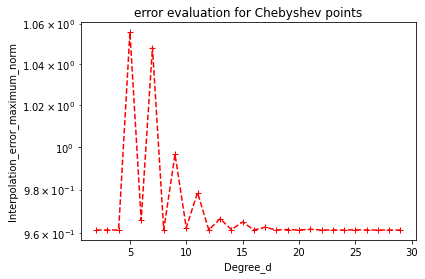

In [19]:
x = generate_cheb_nodes(-1, 1, 1001)
x=np.asarray(x)
err=[]  
for d in range(2, 30):
    t = generate_cheb_nodes(-1, 1, d)
    yd=populate_y(t,runge_fun)
    y=[]
    for i in x:
        y.append(chebyshev_interp_1d ( d, t, yd, i ))
    err.append(np.hstack([d,max(abs(y-runge_fun(x).all()))]))
    
err = np.asarray(err)
plt.figure()
plt.semilogy(err[:,0],err[:,1],"r--+")
plt.xlabel(r"Degree_d")
plt.ylabel(r"Interpolation_error_maximum_norm")
plt.title("error evaluation for Chebyshev points")
plt.savefig('error_cheb11.png',bbox_inches='tight')
plt.show()


 <span style='background :yellow' >  In above graph you can see that max norm , compared to the error in equidistant interpolation , here we can see the error approching to 0 as degree increases ie. exponential convergence </span>




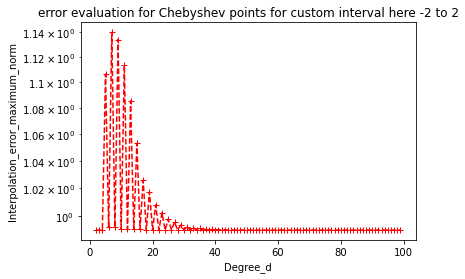

In [12]:
x = generate_cheb_nodes(-2, 2, 1001)
x=np.asarray(x)
err=[]  
for d in range(2, 100):
    t = generate_cheb_nodes(-2, 2, d)
    yd=populate_y(t,runge_fun)
    y=[]
    for i in x:
        y.append(chebyshev_interp_1d ( d, t, yd, i ))
    err.append(np.hstack([d,max(abs(y-runge_fun(x).all()))]))
    
err = np.asarray(err)
plt.figure()
plt.semilogy(err[:,0],err[:,1],"r--+")
plt.xlabel(r"Degree_d")
plt.ylabel(r"Interpolation_error_maximum_norm")
plt.title("error evaluation for Chebyshev points for custom interval here -2 to 2")
plt.show()

In [15]:
def chebyshev2 ( n ):

#  Parameters:
#
#    Input, integer N, the number of points.
#
#    Input, real X(N), the points.
#
  import numpy as np

  x = np.zeros ( n )

  if ( 1 < n ):
    for i in range ( 0, n ):
      x[i] = np.cos ( float ( n - 1 - i ) * np.pi / float ( n - 1 ) )

  return x


def lebesgue_chebyshev2_test ( ):

  print ( '' )
  print ( 'LEBESGUE_CHEBYSHEV2_TEST:' )
  print ( '  Analyze Chebyshev2 points.' )

  nfun = 501
  xfun = r8vec_linspace ( nfun, -1.0, +1.0 )

  n_max = 100
  l = np.zeros ( n_max )
  for n in range ( 1, n_max + 1 ):
    x = chebyshev2 ( n )
    l[n-1] = lebesgue_constant ( n, x, nfun, xfun )

  r8vec_print ( n_max, l, '  Chebyshev2 Lebesgue constants for N = 1 to 100:' )

  l2 = np.zeros ( n )
  for n in range ( 1, n_max + 1 ):
    l2[n-1] = l[n-1] / np.log ( n + 1 )

  r8vec_print ( n_max, l2, '  Chebyshev2 Lebesgue constants/log(N+1):' )
#
#  Examine one case more closely.
#
  n = 100
  x = chebyshev2 ( n )
  r8vec_print ( n, x, '  Chebyshev2 points for N = 100' )

  label = 'Chebyshev2 points for N = 100'
  filename = 'chebyshev2.png'
  lebesgue_plot ( n, x, nfun, xfun, label, filename )
  print ( '' )
  print ( '  Plot file saved as "%s"' % ( filename ) )
#
#  Terminate.
#
  print ( '' )
  print ( 'LEBESGUE_CHEBYSHEV2_TEST' )
  print ( '  Normal end of execution.' )
  return
def r8vec_linspace ( n, a, b ):

#*****************************************************************************80
#
## R8VEC_LINSPACE creates a column vector of linearly spaced values.
#
#  Discussion:
#
#    An R8VEC is a vector of R8's.
#
#    While MATLAB has the built in command 
#
#      x = linspace ( a, b, n )
#
#    that command has the distinct disadvantage of returning a ROW vector.
#
#    4 points evenly spaced between 0 and 12 will yield 0, 4, 8, 12.
#
#    In other words, the interval is divided into N-1 even subintervals,
#    and the endpoints of intervals are used as the points.
#

#
#  Parameters:
#
#    Input, integer N, the number of entries in the vector.
#
#    Input, real A, B, the first and last entries.
#
#    Output, real X(N), a vector of linearly spaced data.
#
  import numpy as np

  x = np.zeros ( n )

  if ( n == 1 ):
    x[0] = ( a + b ) / 2.0
  else:
    for i in range ( 0, n ):
     x[i] = ( ( n - 1 - i ) * a \
            + (         i ) * b ) \
            / ( n - 1     )
 
  return x

def r8vec_print ( n, a, title ):

#
#  Parameters:
#
#    Input, integer N, the dimension of the vector.
#
#    Input, real A(N), the vector to be printed.
#
#    Input, string TITLE, a title.
#
  print ( '' )
  print ( title )
  print ( '' )
  for i in range ( 0, n ):
    print ( '%6d:  %12g' % ( i, a[i] ) )
def lebesgue_constant ( n, x, nfun, xfun ):

## LEBESGUE_CONSTANT estimates the Lebesgue constant for a set of points.
#  Parameters:
#
#    Input, integer N, the number of interpolation points.
#
#    Input, real X(N), the interpolation points.
#
#    Input, integer NFUN, the number of evaluation points.
#
#    Input, real XFUN(CONSTANT), the evaluation points.
#
#    Output, real LMAX, an estimate of the Lebesgue constant for the points.
#
  import numpy as np

  lfun = lebesgue_function ( n, x, nfun, xfun )

  lmax = np.max ( lfun )

  return lmax

  
def lebesgue_function ( n, x, nfun, xfun ):

#
## LEBESGUE_FUNCTION evaluates the Lebesgue function for a set of points.

#  Parameters:
#
#    Input, integer N, the number of interpolation points.
#
#    Input, real X(N), the interpolation points.
#
#    Input, integer NFUN, the number of evaluation points.
#
#    Input, real XFUN(NFUN), the evaluation points.
#
#    Output, real LFUN(NFUN), the Lebesgue function evaluated at XFUN.
#
  import numpy as np
#
#  Handle special case.
#
  if ( n == 1 ):

    lfun = np.ones ( nfun )

  else:

    llfun = lagrange_value ( n, x, nfun, xfun ) 

    lfun = np.zeros ( nfun )

    for j in range ( 0, nfun ):
      t = 0.0
      for i in range ( 0, n ):
        t = t + abs ( llfun[i,j] )
      lfun[j] = t

  return lfun
def lagrange_value ( data_num, t_data, interp_num, t_interp ):

#*****************************************************************************80
#
## LAGRANGE_VALUE evaluates the Lagrange polynomials.
#
#  Discussion:
#
#    Given DATA_NUM distinct abscissas, T_DATA(1:DATA_NUM),
#    the I-th Lagrange polynomial L(I)(T) is defined as the polynomial of
#    degree DATA_NUM - 1 which is 1 at T_DATA(I) and 0 at the DATA_NUM - 1
#    other abscissas.
#
#    A formal representation is:
#
#      L(I)(T) = Product ( 1 <= J <= DATA_NUM, I /= J )
#       ( T - T(J) ) / ( T(I) - T(J) )
#
#    This routine accepts a set of INTERP_NUM values at which all the Lagrange
#    polynomials should be evaluated.
#
#    Given data values P_DATA at each of the abscissas, the value of the
#    Lagrange interpolating polynomial at each of the interpolation points
#    is then simple to compute by matrix multiplication:
#
#      P_INTERP(1:INTERP_NUM) =
#        P_DATA(1:DATA_NUM) * L_INTERP(1:DATA_NUM,1:INTERP_NUM)
#
#    or, in the case where P is multidimensional:
#      P_INTERP(1:M,1:INTERP_NUM) =
#        P_DATA(1:M,1:DATA_NUM) * L_INTERP(1:DATA_NUM,1:INTERP_NUM)

#  Parameters:
#
#    Input, integer DATA_NUM, the number of data points.
#    DATA_NUM must be at least 1.
#
#    Input, real T_DATA(DATA_NUM), the data points.
#
#    Input, integer INTERP_NUM, the number of
#    interpolation points.
#
#    Input, real T_INTERP(INTERP_NUM), the
#    interpolation points.
#
#    Output, real L_INTERP(DATA_NUM,INTERP_NUM), the values
#    of the Lagrange polynomials at the interpolation points.
#
  import numpy as np
#
#  Evaluate the polynomial.
#
  l_interp = np.ones ( [ data_num, interp_num ] )

  for i in range ( 0, data_num ):

    for j in range ( 0, data_num ):

      if ( j != i ):

        for k in range ( 0, interp_num ):

          l_interp[i,k] = l_interp[i,k] \
            * ( t_interp[k] - t_data[j] ) / ( t_data[i] - t_data[j] )

  return l_interp
def lebesgue_plot ( n, x, nfun, xfun, label, filename ):

## LEBESGUE_PLOT plots the Lebesgue function for a set of points.
#
#  Discussion:
#
#    The interpolation interval is assumed to be [min(XFUN), max(XFUN)].

#  Parameters:
#
#    Input, integer N, the number of interpolation points.
#
#    Input, real X(N), the interpolation points.
#
#    Input, integer NFUN, the number of evaluation points.
#
#    Input, real XFUN(NFUN), the evaluation points.  
#
#    Input, string LABEL, a title for the plot.
#
#    Input, string FILENAME, a filename in which to save the plot.
#
  import matplotlib.pyplot as plt
  import numpy as np

  lfun = lebesgue_function ( n, x, nfun, xfun )

  plt.plot ( xfun, lfun, linewidth = 2 )

  ymax = np.ceil ( np.max ( lfun ) ) + 1

  xmin = np.min ( xfun )
  xmax = np.max ( xfun )

  plt.axis ( [ xmin, xmax, 0.0, ymax ] )
  plt.grid ( True )
  plt.xlabel ( '<--- X --->' )
  plt.ylabel ( '<--- Lebesgue(X) --->' )
  plt.title ( label )
  plt.savefig('lesb.png',bbox_inches='tight')
  plt.show()

  plt.clf ( )

  return




LEBESGUE_CHEBYSHEV2_TEST:
  Analyze Chebyshev2 points.

  Chebyshev2 Lebesgue constants for N = 1 to 100:

     0:             1
     1:             1
     2:          1.25
     3:       1.66667
     4:       1.79876
     5:       1.98885
     6:       2.08255
     7:       2.20221
     8:       2.27461
     9:       2.36186
    10:       2.42097
    11:       2.48943
    12:       2.53901
    13:       2.59568
    14:       2.63881
    15:       2.68671
    16:       2.72391
    17:       2.76635
    18:       2.80008
    19:       2.83713
    20:       2.86692
    21:       2.90082
    22:        2.9286
    23:       2.95872
    24:       2.98339
    25:       3.01179
    26:       3.03551
    27:       3.06078
    28:       3.08292
    29:       3.10626
    30:       3.12687
    31:       3.14871
    32:       3.16695
    33:       3.18851
    34:       3.20275
    35:       3.22596
    36:       3.24308
    37:       3.26134
    38:         3.275
    39:       3.29485
    40:     

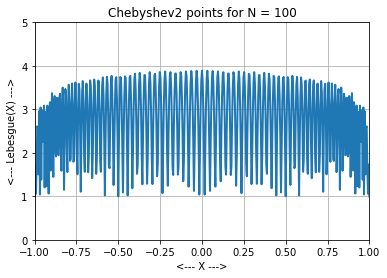


  Plot file saved as "chebyshev2.png"

LEBESGUE_CHEBYSHEV2_TEST
  Normal end of execution.


<Figure size 432x288 with 0 Axes>

In [16]:
lebesgue_chebyshev2_test ( )

<span style='background :yellow' > observation:In fact it is known that as n
 increases to infinity, the Lebesgue constant for n
 Chebyshev points is asymptotic to (2/π)log(n) (you can say that by looking Lebesgue constants/log(N+1) and also the graph)
 </span>

In [17]:
def equidistant2 ( n ):

#*****************************************************************************80
#
## EQUIDISTANT2 returns the Type 2 Equidistant points.
#  Parameters:
#
#    Input, integer N, the number of points.
#
#    Input, real X(N), the points.
#
  import numpy as np

  x = np.zeros ( n )

  if ( 1 < n ):
    for i in range ( 0, n ):
      x[i] = float ( 1 - n + 2 * i ) / float ( n - 1 )

  return x



def lebesgue_equidistant2_test ( ):

## LEBESGUE_EQUIDISTANT2_TEST looks at Equidistant2 points.

  import numpy as np
  import platform

  print ( '' )
  print ( 'LEBESGUE_EQUIDISTANT2_TEST:' )
  print ( '  Python version: %s' % ( platform.python_version ( ) ) )
  print ( '  Analyze Equidistant2 points.' )

  nfun = 501
  xfun = r8vec_linspace ( nfun, -1.0, +1.0 )

  n_max = 100
  l = np.zeros ( n_max )
  for n in range ( 1, n_max + 1 ):
    x = equidistant2 ( n )
    l[n-1] = lebesgue_constant ( n, x, nfun, xfun )

  r8vec_print ( n_max, l, '  Equidistant2 Lebesgue constants for N = 1 to 100:' )
#
#  Examine one case more closely.
#
  n = 100
  x = equidistant2 ( n )
  r8vec_print ( n, x, '  Equidistant2 points for N = 100' )

  label = 'Equidistant2 points for N = 100'
  filename = 'equidistant2.png'
  lebesgue_plot ( n, x, nfun, xfun, label, filename )
  print ( '' )
  print ( '  Plot file saved as "%s"' % ( filename ) )
#
#  Terminate.
#
  print ( '' )
  print ( 'LEBESGUE_EQUIDISTANT2_TEST' )
  print ( '  Normal end of execution.' )
  return



LEBESGUE_EQUIDISTANT2_TEST:
  Python version: 3.8.3
  Analyze Equidistant2 points.

  Equidistant2 Lebesgue constants for N = 1 to 100:

     0:             1
     1:             1
     2:          1.25
     3:       1.63112
     4:       2.20782
     5:       3.10628
     6:       4.54872
     7:       6.92945
     8:       10.9444
     9:       17.8449
    10:       29.8907
    11:        51.176
    12:       89.3237
    13:       158.087
    14:       283.181
    15:       512.348
    16:       933.713
    17:          1715
    18:       3170.34
    19:       5882.81
    20:       10973.5
    21:       20573.7
    22:       38551.6
    23:       72786.6
    24:        137851
    25:        260966
    26:        493812
    27:        942034
    28:   1.80245e+06
    29:   3.44766e+06
    30:    6.5925e+06
    31:   1.26019e+07
    32:   2.40814e+07
    33:   4.63661e+07
    34:   8.96373e+07
    35:   1.73258e+08
    36:   3.34823e+08
    37:    6.4692e+08
    38:   1.24969e+09
    

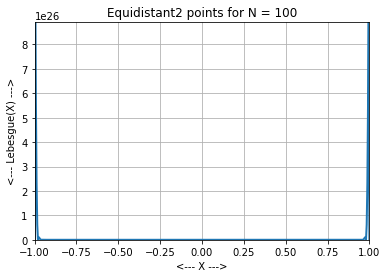


  Plot file saved as "equidistant2.png"

LEBESGUE_EQUIDISTANT2_TEST
  Normal end of execution.


<Figure size 432x288 with 0 Axes>

In [18]:
lebesgue_equidistant2_test ( )

<span style='background :yellow' > observation:This picture confirms the well-known fact (the Runge phenomenon) that polynomial interpolation in equispaced points is terribly ill-conditioned. In fact it is known that as n
 increases to infinity, the Lebesgue constant for n
 Chebyshev points is asymptotic to (2/π)log(n)
 whereas for n
 equispaced points it is 2^n/(enlog(n)).
 </span>